# Numpy polynomial fitting
Demonstrates simple usage of numpy.polynomial.polynomial.polyfit.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial as poly


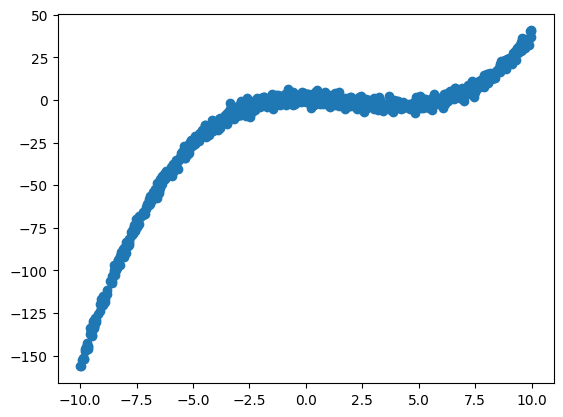

In [2]:
# Generate data

# x: random numbers from -10 to 10
x = np.random.rand(1000) * 20 - 10

# y: cubic equation with some random scatter
def add_unc(y, unc=2):
    '''
    Smear points by a gaussian
    '''
    unc = np.random.normal(y, unc)
    return unc
a0 = 1
a1 = -0.2
a2 = -0.6
a3 = 0.1
y = add_unc(a0 + a1*x + a2*x**2 + a3*x**3)

fig, ax = plt.subplots()
ax.scatter(x, y)

(array([  0.,   0.,   0.,   1.,   6.,  16.,  48.,  83., 159., 191., 186.,
       148.,  98.,  39.,  21.,   3.,   0.,   1.,   0.,   0.]), array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]), <BarContainer object of 20 artists>)


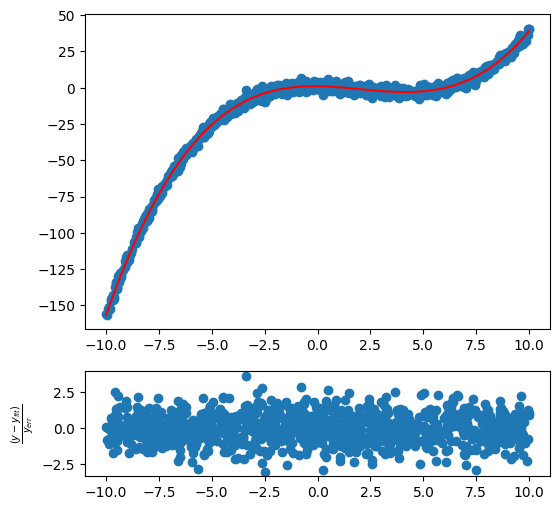

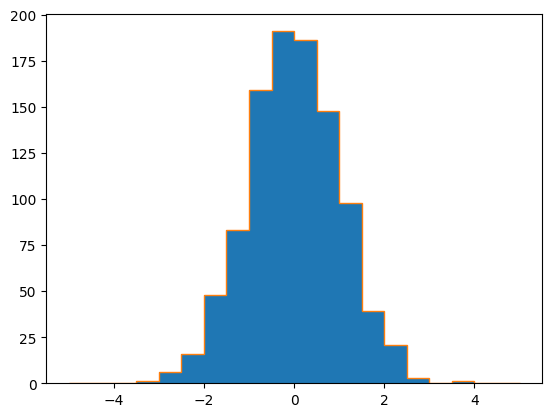

In [3]:
# Weight = 1/sigma
y_errs = np.ones_like(y) * 2.0
weights = 1. / y_errs
poly_coeffs = poly.polynomial.polyfit(x, y, 3, w=weights)

fit_x = np.linspace(-10, 10, 100)
fit_y = poly.polynomial.polyval(fit_x, poly_coeffs)
fig, axs = plt.subplots(2, 1, figsize=(6, 6), height_ratios=[3, 1])
axs[0].scatter(x, y)
axs[0].plot(fit_x, fit_y, color="red")

# Pulls
fit_pulls = (y - poly.polynomial.polyval(x, poly_coeffs)) / y_errs
axs[1].scatter(x, fit_pulls)
axs[1].set_ylabel(r"$\frac{(y - y_{fit})}{y_{err}}$")

# Pull distribution
fig_pull, ax_pull = plt.subplots(1, 1)
bins = np.arange(-5.0, 5.5, 0.5)
pull_hist = plt.hist(fit_pulls, bins=bins)
print(pull_hist)
ax_pull.stairs(pull_hist[0], bins)

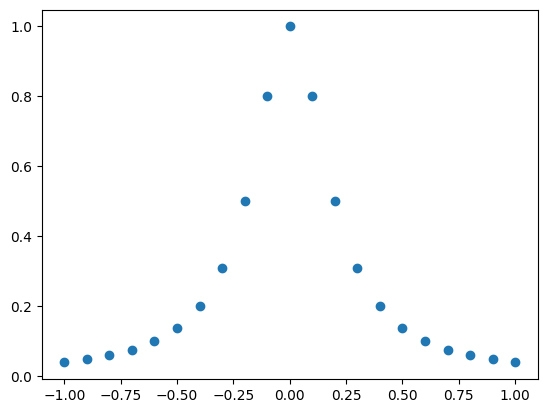

In [5]:
# Compare different fit functions
x = np.linspace(-1.0, 1.0, 21)
y = 1. / (1 + 25*x**2)
fig, ax = plt.subplots(1, 1)
ax.scatter(x, y)

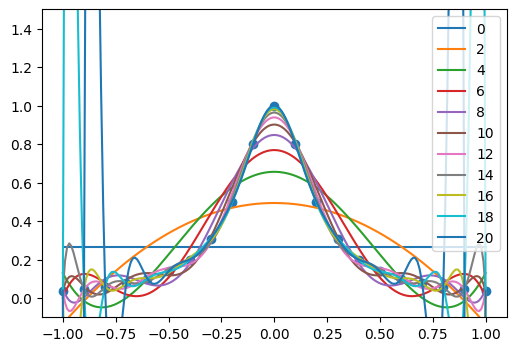

In [6]:
# Polynomials of different orders
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x, y)
poly_coeffs = {}
fit_x = np.linspace(-1.0, 1.0, 200)
fit_y = {}
for order in range(0, 21, 2):
    poly_coeffs = poly.polynomial.polyfit(x, y, order)
    fit_y[order] = poly.polynomial.polyval(fit_x, poly_coeffs)
    ax.plot(fit_x, fit_y[order], label=order)
ax.set_ylim([-0.1, 1.5])
ax.legend()


Polynomial coefficients:
[ 9.80385821e-01 -4.36665436e-12 -1.86359692e+01  1.18250962e-10
  2.11693444e+02 -7.70682599e-10 -1.35991825e+03  1.30512841e-09
  5.04322087e+03  2.69221513e-09 -1.09554073e+04 -1.13393349e-08
  1.36851440e+04  1.27560415e-08 -9.06071416e+03 -4.75368142e-09
  2.45367535e+03]
Chebyshev coefficients:
[ 1.96209346e-01 -3.64036155e-17 -2.63812187e-01  1.15955913e-16
  1.77415632e-01  2.38761796e-17 -1.19405579e-01  6.28026069e-17
  8.05004177e-02  1.19329220e-16 -5.44753235e-02 -4.28810083e-17
  3.71662811e-02  9.33914889e-17 -2.58038436e-02 -9.54522666e-17
  1.85700211e-02]


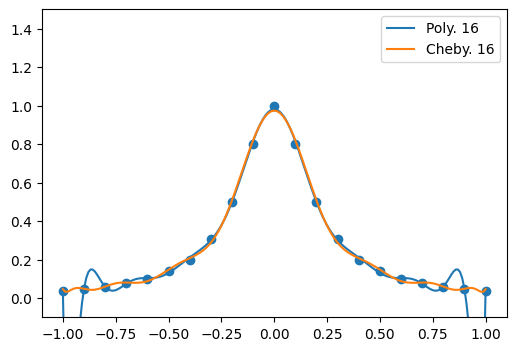

In [7]:
# Polynomial vs. Chebyshev
order = 16
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(x, y)
poly_coeffs = poly.polynomial.polyfit(x, y, order)
fit_x = np.linspace(-1.0, 1.0, 200)
fit_y = {}
fit_y["poly"] = poly.polynomial.polyval(fit_x, poly_coeffs)
ax.plot(fit_x, fit_y["poly"], label=f"Poly. {order}")

# Chebyshev: choose measurement points at Chebyshev nodes
cheby_x = poly.chebyshev.chebpts1(21)
cheby_y = 1. / (1. + 25 * cheby_x**2)
cheby_coeffs = poly.chebyshev.chebfit(cheby_x, cheby_y, order)
fit_y["cheby"] = poly.chebyshev.chebval(fit_x, cheby_coeffs)
ax.plot(fit_x, fit_y["cheby"], label=f"Cheby. {order}")
ax.set_ylim([-0.1, 1.5])
ax.legend()

# Print coefficients to anticipate numerical issues
print("Polynomial coefficients:")
print(poly_coeffs)
print("Chebyshev coefficients:")
print(cheby_coeffs)

In [8]:
a = 1.e15 + 4321.123456789
b = 1.e15
a - b

4321.125